In [90]:
##########
# Hexagons with homicide decrease/without homicide waves
%pwd

'/home/nitomanto/anita-ujp-homicide'

In [76]:
import pandas as pd
import numpy as np
import geopandas as gpd
import shapely
import re
from cartopy import crs as ccrs
import matplotlib.pyplot as plt
import shapely

In [2]:
df = gpd.read_file('/home/nitomanto/anita-ujp-homicide/hexhom.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head(6)

,GRID_ID,year,hom_ct,bldg_ct,hom_rt,geom1,geom2,geom3,geom4,geom5,geom6,geom7,geom8,geom9,geom10,geom11,geom12,geom13,geom14
0,AJ-37,1874,0,0,NA,list(c(-87.6186904368855,-87.6216943961905,-87.6277023148006,-87.6307062741056,-87.6277023148006,-87.6216943961905,-87.6186904368855,41.6497461319232,41.6445431217832,41.6445431217832,41.6497461319232,41.6549491420635,41.6549491420635,41.6497461319232))
1,AK-37,1874,0,4.19822270593398,0,list(c(-87.6096785589704,-87.6126825182754,-87.6186904368855,-87.6216943961905,-87.6186904368855,-87.6126825182754,-87.6096785589704,41.6445431217832,41.6393401116429,41.6393401116429,41.6445431217832,41.6497461319232,41.6497461319232,41.6445431217832))
2,AL-37,1874,0,0.001777294066012,0,list(c(-87.6006666810553,-87.6036706403603,-87.6096785589704,-87.6126825182754,-87.6096785589704,-87.6036706403603,-87.6006666810553,41.6497461319232,41.6445431217832,41.6445431217832,41.6497461319232,41.6549491420635,41.6549491420635,41.6497461319232))
3,AM-37,1874,0,0,NA,list(c(-87.5916548031402,-87.5946587624452,-87.6006666810553,-87.6036706403603,-87.6006666810553,-87.5946587624452,-87.5916548031402,41.6445431217832,41.6393401116429,41.6393401116429,41.6445431217832,41.6497461319232,41.6497461319232,41.6445431217832))
4,AN-37,1874,0,0,NA,list(c(-87.5826429252251,-87.5856468845301,-87.5916548031402,-87.5946587624452,-87.5916548031402,-87.5856468845301,-87.5826429252251,41.6497461319232,41.6445431217832,41.6445431217832,41.6497461319232,41.6549491420635,41.6549491420635,41.6497461319232))
5,AO-37,1874,0,0,NA,list(c(-87.5736310473101,-87.576635006615,-87.5826429252251,-87.5856468845301,-87.5826429252251,-87.576635006615,-87.5736310473101,41.6445431217832,41.6393401116429,41.6393401116429,41.6445431217832,41.6497461319232,41.6497461319232,41.6445431217832))


In [5]:
df.geom1.dtype

dtype('O')

In [6]:
df['geom1'] = df.apply(lambda row: re.sub(r'[a-z*+*a-z*+*]', '', row.geom1), axis=1)
df['geom1'] = df.apply(lambda row: row.geom1[2:], axis=1)

In [7]:
df['geom14'] = df.apply(lambda row: row.geom14[:-2], axis=1)

In [8]:
for n in range(1,15):
    df[f'geom{n}'] = df[f'geom{n}'].astype(float)

In [9]:
df.head()

,GRID_ID,year,hom_ct,bldg_ct,hom_rt,geom1,geom2,geom3,geom4,geom5,geom6,geom7,geom8,geom9,geom10,geom11,geom12,geom13,geom14
0,AJ-37,1874,0,0,NA,-87.618690,-87.621694,-87.627702,-87.630706,-87.627702,-87.621694,-87.618690,41.649746,41.644543,41.644543,41.649746,41.654949,41.654949,41.649746
1,AK-37,1874,0,4.19822270593398,0,-87.609679,-87.612683,-87.618690,-87.621694,-87.618690,-87.612683,-87.609679,41.644543,41.639340,41.639340,41.644543,41.649746,41.649746,41.644543
2,AL-37,1874,0,0.001777294066012,0,-87.600667,-87.603671,-87.609679,-87.612683,-87.609679,-87.603671,-87.600667,41.649746,41.644543,41.644543,41.649746,41.654949,41.654949,41.649746
3,AM-37,1874,0,0,NA,-87.591655,-87.594659,-87.600667,-87.603671,-87.600667,-87.594659,-87.591655,41.644543,41.639340,41.639340,41.644543,41.649746,41.649746,41.644543
4,AN-37,1874,0,0,NA,-87.582643,-87.585647,-87.591655,-87.594659,-87.591655,-87.585647,-87.582643,41.649746,41.644543,41.644543,41.649746,41.654949,41.654949,41.649746


In [10]:
df['geometry']= df.apply(
    lambda row: [
        (row.geom1, row.geom8),
        (row.geom2, row.geom9),
        (row.geom3, row.geom10),
        (row.geom4, row.geom11),
        (row.geom5, row.geom12),
        (row.geom6, row.geom13),
        (row.geom7, row.geom14),  # Close the hexagon by repeating the first point
    ],
    axis=1,
)

In [13]:
df['geometry'] = df.apply(
    lambda row: shapely.Polygon(row.geometry),
    axis = 1
)

In [14]:
df = df[['GRID_ID', 'year', 'hom_ct', 'bldg_ct', 'hom_rt', 'geometry']]

In [15]:
gdf = gpd.GeoDataFrame(
    df, geometry='geometry', crs="EPSG:4326"
)

In [16]:
gdf['year'] = gdf['year'].astype(int)
gdf['hom_ct'] = gdf['hom_ct'].astype(int)
gdf['bldg_ct'] = gdf['bldg_ct'].astype(float)

<Axes: >

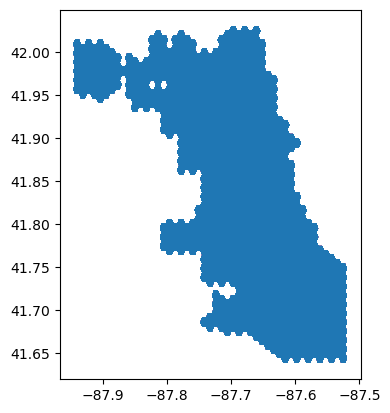

In [17]:
gdf.plot()

In [25]:
# Sorting columns
gdf = gdf.sort_values(by=['GRID_ID', 'year'])
# creating 'is_wave'
gdf["is_wave"] = (gdf["hom_ct"].astype(int) >= 3).astype(int)
# creating 'wave_group'
gdf["wave_group"] = (gdf["is_wave"].shift(fill_value=0) == 0) & (gdf["is_wave"] == 1)
gdf["wave_group"] = gdf["wave_group"].cumsum() * gdf["is_wave"]

In [30]:
wave_metrics = gdf[gdf["is_wave"] == 1].groupby(["GRID_ID", "wave_group"]).agg(
    wave_lifespan=("year", lambda x: x.max() - x.min() + 1),
    wave_amplitude=("hom_ct", "max"),
    wave_start_year=("year", "min")
).reset_index()

In [31]:
wave_metrics.head()

,GRID_ID,wave_group,wave_lifespan,wave_amplitude,wave_start_year
0,AA-10,1,1,3,1928
1,AA-10,2,1,5,1975
2,AA-10,3,2,5,1980
3,AA-10,4,2,4,1984
4,AA-10,5,5,6,1989


In [33]:
wave_frequency = wave_metrics.groupby("GRID_ID").size().reset_index(name="wave_frequency")

wave_frequency.head()

,GRID_ID,wave_frequency
0,AA-10,8
1,AA-11,8
2,AA-12,7
3,AA-13,9
4,AA-14,10


In [34]:
wave_metrics["wave_decade"] = (wave_metrics["wave_start_year"] // 10) * 10
wave_rate_per_decade = wave_metrics.groupby(["GRID_ID", "wave_decade"]).size().reset_index(name="wave_rate")
wave_rate_per_decade = wave_rate_per_decade.groupby("GRID_ID")["wave_rate"].mean().reset_index(name="rate_per_decade")
wave_metrics["wave_amplitude"] = pd.to_numeric(wave_metrics["wave_amplitude"], errors="coerce")

wave_metrics.head(), wave_rate_per_decade.head()

(  GRID_ID  wave_group  wave_lifespan  wave_amplitude  wave_start_year  \
 0   AA-10           1              1               3             1928   
 1   AA-10           2              1               5             1975   
 2   AA-10           3              2               5             1980   
 3   AA-10           4              2               4             1984   
 4   AA-10           5              5               6             1989   
 
    wave_decade  
 0         1920  
 1         1970  
 2         1980  
 3         1980  
 4         1980  ,
   GRID_ID  rate_per_decade
 0   AA-10             1.60
 1   AA-11             2.00
 2   AA-12             1.75
 3   AA-13             2.25
 4   AA-14             1.25)

In [40]:
CURRENT_YEAR = 2017

In [41]:
longest_gaps = wave_metrics.groupby("GRID_ID").agg(
    last_wave_end=pd.NamedAgg(
        column="wave_start_year", 
        aggfunc=lambda x: (x + wave_metrics.loc[x.index, "wave_lifespan"]).max()
    )
).reset_index()

In [44]:
longest_gaps["longest_gap"] = CURRENT_YEAR - longest_gaps["last_wave_end"]
longest_gaps = longest_gaps.sort_values(by="longest_gap", ascending=False)


In [51]:
shapefile = gpd.read_file('Jada_Hexagons/hex_hom_bldg.shp')

In [52]:
shapefile.head()

,GRID_ID,year,hom_ct,bldg_ct,hom_rt,geometry
0,AJ-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.61869 41.64975, -87.62169 41.644..."
1,AK-37,1874,0.0,4.198223,0.0,"POLYGON ((-87.60968 41.64454, -87.61268 41.639..."
2,AL-37,1874,0.0,0.001777,0.0,"POLYGON ((-87.60067 41.64975, -87.60367 41.644..."
3,AM-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.59165 41.64454, -87.59466 41.639..."
4,AN-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.58264 41.64975, -87.58565 41.644..."


In [54]:
map_data = shapefile.merge(longest_gaps, on="GRID_ID", how="left")

In [69]:
map_data['geometry'] = map_data.geometry.to_crs(epsg=4326)

In [70]:
highlight_hexagons = map_data.nlargest(10, "longest_gap")


In [71]:
map_data.head()

,GRID_ID,year,hom_ct,bldg_ct,hom_rt,geometry,last_wave_end,longest_gap
0,AJ-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.61869 41.64975, -87.62169 41.644...",NaN,NaN
1,AK-37,1874,0.0,4.198223,0.0,"POLYGON ((-87.60968 41.64454, -87.61268 41.639...",NaN,NaN
2,AL-37,1874,0.0,0.001777,0.0,"POLYGON ((-87.60067 41.64975, -87.60367 41.644...",1996.0,21.0
3,AM-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.59165 41.64454, -87.59466 41.639...",NaN,NaN
4,AN-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.58264 41.64975, -87.58565 41.644...",NaN,NaN


In [72]:
commarea = gpd.read_file('comm_area_shapefiles/CHI Community Areas.shp')
commarea.geometry = commarea.geometry.to_crs(epsg=4326)

In [59]:
%whos

Variable               Type            Data/Info
------------------------------------------------
CURRENT_YEAR           int             2017
ax                     Axes            Axes(0.176329,0.11;0.568671x0.77)
ccrs                   module          <module 'cartopy.crs' fro<...>packages/cartopy/crs.py'>
df                     DataFrame              GRID_ID  year hom_<...>[110014 rows x 6 columns]
fig                    Figure          Figure(1000x1000)
gdf                    GeoDataFrame           GRID_ID  year  hom<...>[110014 rows x 8 columns]
gdf_2000               GeoDataFrame          GRID_ID  year  hom_<...>n\n[821 rows x 6 columns]
gpd                    module          <module 'geopandas' from <...>s/geopandas/__init__.py'>
highlight_hexagons     GeoDataFrame         GRID_ID  year  hom_c<...>.0  \n7665        117.0  
label                  str             AG-21
longest_gaps           DataFrame           GRID_ID  last_wave_en<...>n\n[391 rows x 3 columns]
map_data          

/tmp/ipykernel_214090/4117501825.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(highlight_hexagons.geometry.centroid.x,
/tmp/ipykernel_214090/4117501825.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  highlight_hexagons.geometry.centroid.y,


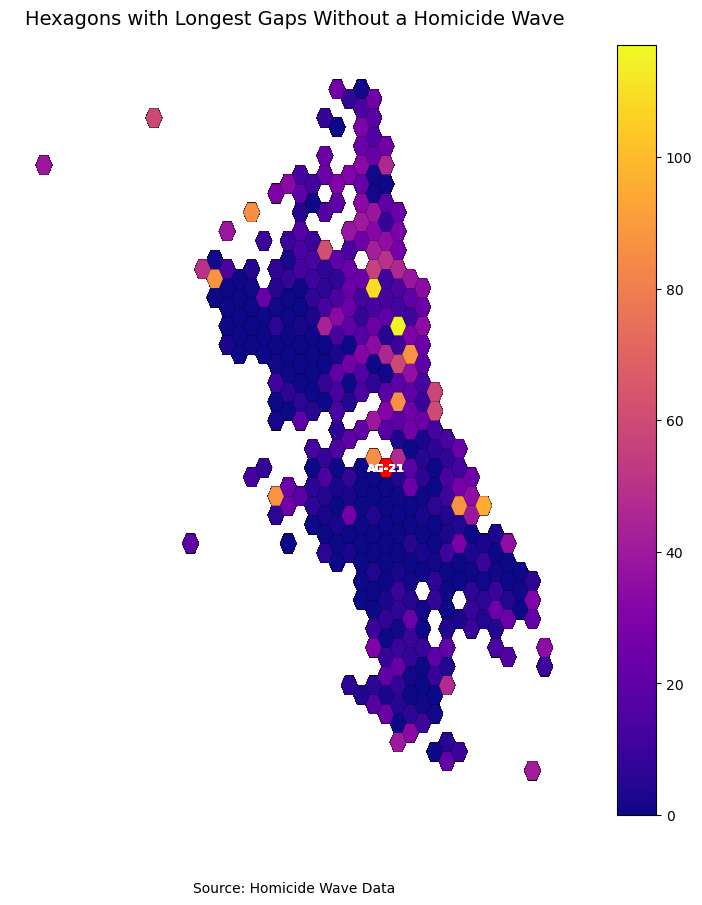

In [74]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot all hexagons colored by longest_gap
map_data.plot(column="longest_gap", cmap="plasma", edgecolor="black", linewidth=0.1, legend=True, ax=ax)

# Highlight top hexagons with longest gaps in red
highlight_hexagons.plot(facecolor="red", edgecolor="black", linewidth=0.2, ax=ax)

# Add labels for highlighted hexagons (GRID_ID)
for x, y, label in zip(highlight_hexagons.geometry.centroid.x, 
                        highlight_hexagons.geometry.centroid.y, 
                        highlight_hexagons["GRID_ID"]):
    ax.text(x, y, label, fontsize=8, color="white", ha="center", va="center", weight="bold")

# Plot community boundaries
'''
commarea.plot(facecolor="none", edgecolor="white", linewidth=2.5, ax=ax)

# Add community labels
for x, y, label in zip(commarea.geometry.centroid.x, 
                        commarea.geometry.centroid.y, 
                        commarea["COMMUNITY"]):
    ax.text(x, y, label, fontsize=8, color="white", ha="center", va="center")
'''

# Title & Labels
ax.set_title("Hexagons with Longest Gaps Without a Homicide Wave", fontsize=14, pad=15)
ax.annotate("Source: Homicide Wave Data", xy=(0.5, -0.1), xycoords="axes fraction", ha="center", fontsize=10)

# Remove axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Optional: Add basemap
# ctx.add_basemap(ax, crs=map_data.crs, source=ctx.providers.CartoDB.Positron)

# Show plot
plt.show()

In [75]:
projects = pd.read_csv('Affordable_Rental_Housing_Developments_20250212.csv') # Loading data found from Chicago Data Portal
# link: https://data.cityofchicago.org/Community-Economic-Development/Affordable-Rental-Housing-Developments-Map/k3g7-7kgc

In [83]:
# making geometry column
projects['geometry'] = projects.apply(
    lambda x: shapely.Point(x.Longitude, x.Latitude),
    axis = 1
)

In [88]:
# convert to geopandas
projects = gpd.GeoDataFrame(projects, geometry='geometry', 
                            crs='EPSG:4326'
                            )

In [102]:
projects.head()

,Community Area Name,Community Area Number,Property Type,Property Name,Address,Zip Code,Phone Number,Management Company,Units,X Coordinate,Y Coordinate,Latitude,Longitude,Location,geometry
0,Avondale,21,Multifamily,Hairpin Lofts,3414 W. Diversey Ave.,60647,773-292-6360,Leasing & Management Co. Inc.,25.0,1153078.890,1918447.998,41.932073,-87.712872,NaN,POINT (-87.71287 41.93207)
1,Loop,32,ARO,1000M,1000 S. Michigan Ave.,60605,312-820-1000,Willow Bridge,23.0,1177375.505,1895971.036,41.869878,-87.624269,NaN,POINT (-87.62427 41.86988)
2,Logan Square,22,ARO,2556 Armtiage LLC,2556 W. Armitage Ave,60647,773-252-0600,North Clybourn Group,1.0,1158751.315,1913231.215,41.917643,-87.692170,"(41.917642826462, -87.6921699562562)",POINT (-87.69217 41.91764)
3,Douglas,35,Multifamily,South Park Plaza,2600 S. King Dr.,60616,312-674-9210,Woodlawn Comm. Dev. Corp.,134.0,1179206.472,1887158.196,41.845653,-87.617816,"(41.8456529117633, -87.6178163910093)",POINT (-87.61782 41.84565)
4,Near West Side,28,ARO,The Rosie,1461 S. Blue Island Ave.,60608,872-259-7452,The FLATS,7.0,1168331.384,1892984.019,41.861881,-87.657558,"(41.86188117554516, -87.65755843617394)",POINT (-87.65756 41.86188)


In [107]:
map_data.head()

,GRID_ID,year,hom_ct,bldg_ct,hom_rt,geometry,last_wave_end,longest_gap
0,AJ-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.61869 41.64975, -87.62169 41.644...",NaN,NaN
1,AK-37,1874,0.0,4.198223,0.0,"POLYGON ((-87.60968 41.64454, -87.61268 41.639...",NaN,NaN
2,AL-37,1874,0.0,0.001777,0.0,"POLYGON ((-87.60067 41.64975, -87.60367 41.644...",1996.0,21.0
3,AM-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.59165 41.64454, -87.59466 41.639...",NaN,NaN
4,AN-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.58264 41.64975, -87.58565 41.644...",NaN,NaN


In [103]:
projects.shape

(598, 15)

In [115]:
map_projects = gpd.sjoin(map_data, projects, predicate='intersects')

In [116]:
map_projects['Community Area Name'].isna().value_counts()

Community Area Name
False    80132
Name: count, dtype: int64

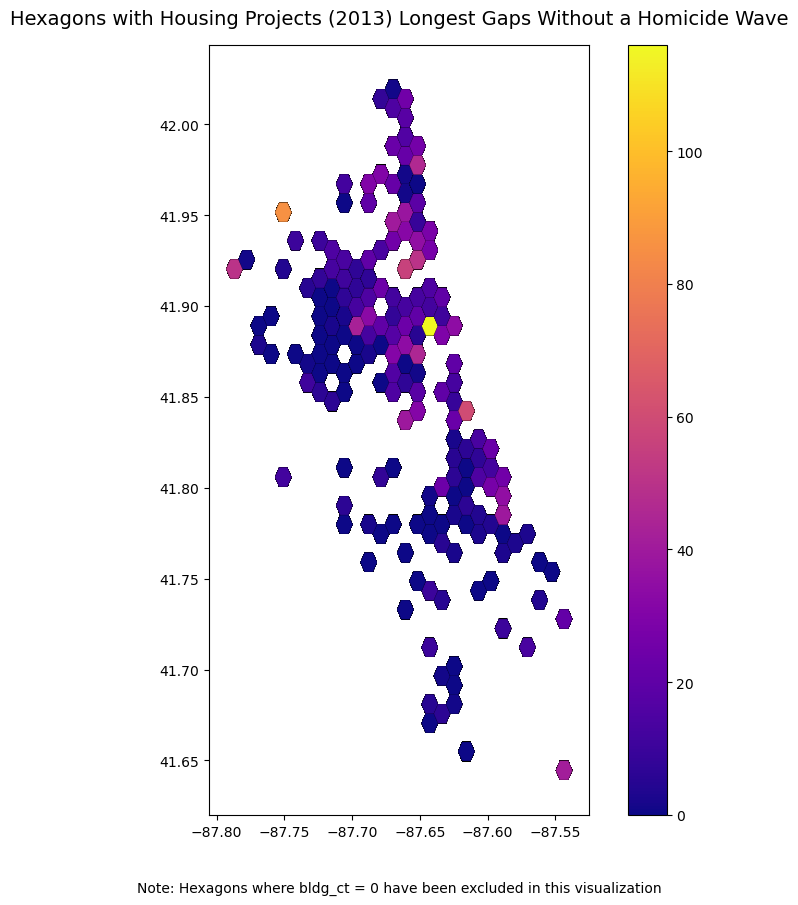

In [118]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot all hexagons colored by longest_gap
map_projects[map_projects.bldg_ct > 0].plot(column="longest_gap", cmap="plasma", edgecolor="black", linewidth=0.1, legend=True, ax=ax)
ax.set_title("Hexagons with Housing Projects (2013) Longest Gaps Without a Homicide Wave", fontsize=14, pad=15)
ax.annotate("Note: Hexagons where bldg_ct = 0 have been excluded in this visualization", xy=(0.5, -0.1), xycoords="axes fraction", ha="center", fontsize=10)

plt.show()